## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
pd.isnull(X).values.any() # пропусков нет

False

In [4]:
pd.isnull(y).any() # пропусков нет

False

In [5]:
(X.dtypes == "object").values.any() # категориальных переменных нет

False

In [6]:
y.dtype == "object" # категориальных переменных нет

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = np.random.seed(203))

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
normalizer = StandardScaler()
X = normalizer.fit_transform(X)
X = pd.DataFrame(data=X)
X.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[[0, 4]], y, test_size=0.3, random_state = np.random.seed(203))

In [11]:
knumber = [1, 3, 5, 10, 15, 25]
clfkn = []
newList = []
for kn in knumber:
  newk = KNeighborsClassifier(n_neighbors=kn, metric = 'euclidean')
  clfkn.append(newk)
  newk.fit(X_train, y_train)
  for X_data, y_data in zip([X_train, X_test], [y_train, y_test]):
    y_predicted = newk.predict(X_data)
    newList.append(float('{:.2f}'.format(np.mean(y_predicted==y_data))))

In [12]:
output101 = {'NN': pd.Series(knumber),
             'Train': pd.Series(newList[::2]),
             'Test': pd.Series(newList[1::2])}
output100 = pd.DataFrame(output101)
output100.set_index('NN', inplace = True)
output100 # доля правильных ответов

,Train,Test
NN,,
1,0.99,0.65
3,0.85,0.67
5,0.80,0.63
10,0.79,0.61
15,0.78,0.63
25,0.79,0.59


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

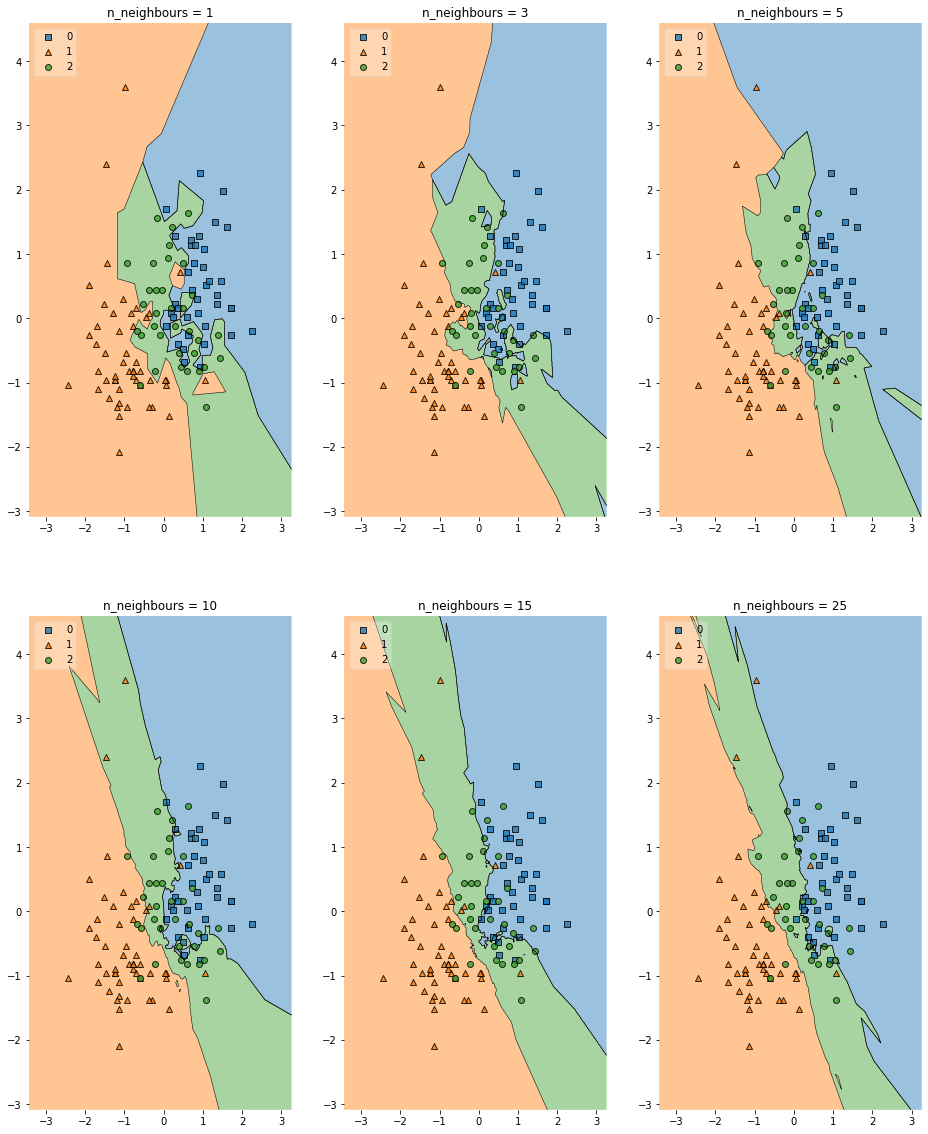

In [282]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16,20))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip(clfkn,
                         labels,
                         [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X_train), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Если количество соседей равно 1, то произойдёт переобучение: область начнёт дробиться на маленькие кусочки, что неправильно, ведь в качестве разделителя должна получиться линия. Использовать слишком большое количество соседей также неправильно, поскольку модуль будет стремиться предсказывать для всех объектов один ответ. Таким образом, при увеличении k качество модели будет увеличиваться лишь до определённого момента, далее оно начнёт снижаться. Этот "момент" и является оптимальным числом соседей k. В примере оптимальное k равно 10 или 15.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

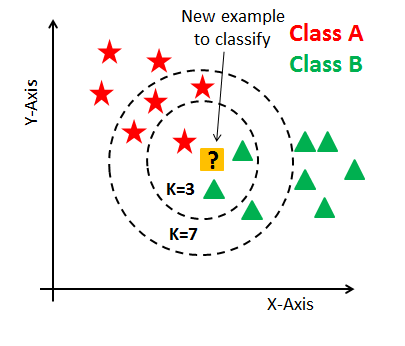

In [15]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X = X
      self.y = y
      pass
    
    def predict(self, X):
      lfxlist = []
      for lf in X:
        m10 = lf

        m100 = (self.X - m10) * (self.X - m10)
        m101 = np.array([arr for arr in zip(m100, self.y)])
        m102 = []
        for i in range(len(m100)):
          m102.append(sum(m100[i]))
        m102 = np.array(m102)
        m103 = np.sqrt(m102)
        m104 = np.array([arr for arr in zip(m103, self.y)])

        m105firstmask = np.sort(m103)
        m106 = m105firstmask[0: self.k]
        m108 = np.where(m104[:, 0] <= m106[-1])
        m109neededclf = self.y[m108]
        m110 = Counter(m109neededclf).most_common(self.k)
        lfxlist.append(m110[0][0])
      return np.array(lfxlist)
      pass

In [16]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [17]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

<ipython-input-15-895ccba80def>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m101 = np.array([arr for arr in zip(m100, self.y)])


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [21]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [22]:
X = data
pd.isnull(X).values.any() # пропусков нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [23]:
X = X.drop(X.columns[[0]], axis = 1) # удалим один бессмысленный столбец (Unnamed)
X.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [24]:
# корреляционная матрица
X.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


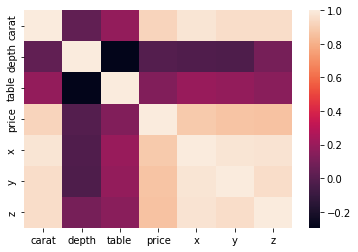

In [25]:
# тепловая карта (цветовая дифференциация числовых значений)

import seaborn as sns

sns.heatmap(X.corr());

Цены бриллианта price сильнее всего коррелирует со следующими переменными: массой бриллианта (carat), его длиной в мм (x), шириной в мм (y) и высотой в мм (z).

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [26]:
y = X[['price']]
X = X.drop(X.columns[[6]], axis = 1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [27]:
X_dum = pd.get_dummies(X, drop_first=True)
X_dum.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state = np.random.seed(203))

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [29]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test MSE: {mean_squared_error(y_test, lr.predict(X_test))}")

Train MSE: 1262254.0045458332
Test MSE: 1310888.4071665301


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [31]:
lr.coef_

array([[ 5292.67888934,   -94.00442653,   -61.36034671, -1104.0700122 ,
           -7.64975003,   -26.69361033,   169.28809463,   410.24204777,
          333.56472349,   307.33667996,   -75.12441697,   -93.90854942,
         -186.18563934,  -348.37471202,  -439.15445901,  -522.20006065,
          934.61206796,  1554.08221101,  1002.57463172,  1619.13541904,
         1763.41644111,  1239.9297179 ,  1425.41391591]])

Среди вещественных переменных масса бриллианта (carat) и его длина в мм (x) имеют оценки коэффициентов, на порядок превышающие оценки прочих вещественных переменных.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [32]:
from sklearn.linear_model import Lasso, Ridge

print("Previously")
print(lr.coef_)

lasso = Lasso(10.0).fit(X_train, y_train)
print("\nLasso")
print(lasso.coef_)

ridge = Ridge(10.0).fit(X_train, y_train)
print("\nRidge")
print(ridge.coef_)

Previously
[[ 5292.67888934   -94.00442653   -61.36034671 -1104.0700122
     -7.64975003   -26.69361033   169.28809463   410.24204777
    333.56472349   307.33667996   -75.12441697   -93.90854942
   -186.18563934  -348.37471202  -439.15445901  -522.20006065
    934.61206796  1554.08221101  1002.57463172  1619.13541904
   1763.41644111  1239.9297179   1425.41391591]]

Lasso
[4801.2792505   -99.79874704  -70.6568272  -667.67997383   -0.
  -23.81600026   52.65281563  217.71899077  158.63286503  147.73458328
   -5.27084879  -29.01112936 -109.25075858 -277.1517692  -367.75182267
 -461.91292655  629.8298782   835.12182259  379.15351015 1010.49034948
 1061.77826687  815.27393924  932.07529963]

Ridge
[[ 5254.84881838   -92.21740917   -61.46521564 -1062.91158931
     -9.60942152   -30.12676674   169.85473267   411.38494883
    334.54004933   308.66045827   -74.75790291   -93.7964189
   -185.70108343  -347.58177462  -437.91150168  -520.91003854
    922.83441631  1524.83301369   977.71248229  15

Lasso: коэффициент при переменной carat (масса бриллианта) уменьшился примерно на 10%, коэффициент при переменной x (длина бриллианта в мм) уменьшился примерно на 40%. При этом нулевое значение принял коэффициент при переменной y (ширина бриллианта в мм). По сути, переменная y при подходе Lasso не должна включаться в регрессию. И действительно: длина и ширина бриллианта обычно сильно скоррелированы, особенно если основание брилллианта можно вписать в квадрат.

Ridge: коэффициенты при переменных изменились, но не так существенно, как при подходе Lasso, особенно если рассмотреть изначально большие коэффициенты при переменных carat и x.

Впрочем, нулевое значение коэффициента при переменной y и уменьшение коэффициентов при переменных carat и x в Lasso-регрессии свидетельствуют о достаточно сильной мультиколлинеарности в изначальной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [33]:
a = [0.1, 1, 10, 100, 200]
clfLasso = []
clfRidge = []

for i in a:
  clfLasso.append(np.linalg.norm(Lasso(i).fit(X_train, y_train).coef_))

for j in a:
  clfRidge.append(np.linalg.norm(Ridge(j).fit(X_train, y_train).coef_))

In [34]:
LassoRidge = {'alpha': pd.Series(a),
             'Lasso': pd.Series(clfLasso),
             'Ridge': pd.Series(clfRidge)}
dfLassoRidge = pd.DataFrame(LassoRidge)
dfLassoRidge

,alpha,Lasso,Ridge
0,0.1,6610.522180,6623.319613
1,1.0,6490.053776,6616.913232
2,10.0,5382.263155,6553.908332
3,100.0,3845.887312,6013.693003
4,200.0,3556.845603,5554.797973


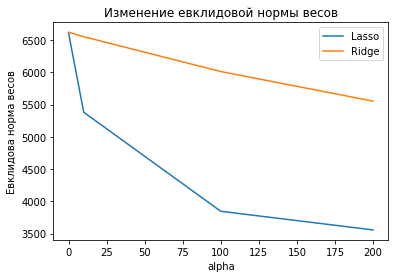

In [35]:
plt.plot(dfLassoRidge['alpha'], dfLassoRidge['Lasso'], label = "Lasso")
plt.plot(dfLassoRidge['alpha'], dfLassoRidge['Ridge'], label = "Ridge")
plt.title('Изменение евклидовой нормы весов')
plt.xlabel('alpha')
plt.ylabel('Евклидова норма весов')
plt.legend()
plt.show()

Как видно из графика, Lasso-регрессия уменьшает веса более агрессивно, чем Ridge-регрессия, что особенно заметно при увеличении параметра регуляриазции alpha. Следовательно, Lasso-регрессия, изменяя значения коэффициентов при переменных, даёт более очевидный ответ относительно того, присутствовала ли в изначальной регрессии мультиколлинеарность, поэтому Lasso-регрессию часто используют для отбора признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [36]:
from sklearn.linear_model import LassoCV

reg1 = LassoCV(alphas=a, cv=5, random_state = np.random.seed(203)).fit(X_train, y_train).alphas_
print(f"\nAlphas: {reg1}\n")
reg2 = LassoCV(alphas=a, cv=5, random_state = np.random.seed(203)).fit(X_train, y_train).mse_path_
reg3 = np.mean(reg2, axis=0)
print(f"\n {reg2}")
print(f"\nMSE: {reg3}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 [[2205942.6071548  2169635.11241233 2069084.52799102 2205536.56546034
  2047319.74159091]
 [1802700.47367628 1783964.74767862 1690282.82193208 1851998.25113444
  1706238.35589533]
 [1344716.6512673  1329661.87097208 1252050.55049012 1386715.61217634
  1316367.05914681]
 [1274527.0440349  1279702.01483982 1201505.85740264 1316511.01750589
  1265854.47016654]
 [1272128.56301962 1280191.45742231 1202051.97125481 1316456.25145402
  1265229.45823492]]

MSE: [1580003.06783058 1568631.04066503 1482995.14581413 1615443.53954621
 1520201.8170069 ]


Наименьшее значение MSE, то есть наилучшее качество, достигается при alpha = 1.e+01 = 10

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [38]:
newModel = Lasso(10.0).fit(X_train, y_train)
print("New model")
print(lasso.coef_)

New model
[4801.2792505   -99.79874704  -70.6568272  -667.67997383   -0.
  -23.81600026   52.65281563  217.71899077  158.63286503  147.73458328
   -5.27084879  -29.01112936 -109.25075858 -277.1517692  -367.75182267
 -461.91292655  629.8298782   835.12182259  379.15351015 1010.49034948
 1061.77826687  815.27393924  932.07529963]


Можно предположить, что признак carat (масса бриллианта) достаточно информативен: даже после проведения кросс-валидации коэффициент остаётся достаточно большим. Смысл переменной также подтверждает, что большое абсолютное значение коэффициента в данном случае, скорее всего, не является признаком переобучения: масса бриллианта измеряется с точностью до сотых, её незначительное увеличение может существенно повлиять на цену бриллианта.

Как уже отмечалось, неинформативным оказался признак y (ширина бриллианта в мм): длина и ширина бриллианта обычно сильно скоррелированы, особенно если основание брилллианта можно вписать в квадрат. Возможно, действительно не имеет смысла включать в модель ширину бриллианта, если в модели есть длина. Так можно интерпретировать, почему коэффициент перед y в Lasso-регрессии оказался равным нулю.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [39]:
lr = LinearRegression().fit(X_train, y_train)
print(f"Linear Regression test MSE: {mean_squared_error(y_test, lr.predict(X_test))}\n")
print(f"New model test MSE: {mean_squared_error(y_test, newModel.predict(X_test))}")

Linear Regression test MSE: 1310888.4071665301

New model test MSE: 1379549.6219885964


MSE двух моделей сопоставима, однако у обычной линейной регрессии показатель немного меньше. Следовательно, в данном случае обычная линейная регрессия более предпочтительна, чем Lasso-регрессия. Возможно, причина заключается в том, что параметров alpha для выбора в кросс-валидации для Lasso-регрессии было недостаточно. Таким образом, мог существовать параметр alpha не из списка [0.1, 1, 10, 100, 200], при котором ошибка Lasso-регрессии могла быть меньше. Другая возможная причина - MSE не является самым оптимальным способом измерить ошибку для данного набора данных. Вследствие наличия выбросов или прочих факторов другая функция потерь (например, MAE) могла показать иной результат сравнения моделей.